<a href="https://colab.research.google.com/github/ruppppak/Car-Price-Prediction-using-ML-Models/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


# Data collection from dataset

In [3]:
car_dataset=pd.read_csv('/content/drive/MyDrive/DATASET/car data.csv')

In [7]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Checking the dimensions

In [9]:
car_dataset.shape

(301, 9)

In [10]:
# Getting some information abot the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Checking for null values in the data


In [12]:
# check the Numbe rof missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [15]:
# checking the distribution for categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [16]:
# data pre-processing
# encoding the categorical data

In [17]:
# encoding fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)

In [18]:
# encoding Seller type column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

In [19]:
# encoding Transmission type column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [76]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


In [78]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [89]:
# Splitting the data into Test and the train Data
# we will not use the car name for prediction
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [90]:
X.count()

,0
Year,301
Present_Price,301
Kms_Driven,301
Fuel_Type,301
Seller_Type,301
Transmission,301
Owner,301


In [91]:
Y.count()

np.int64(301)

In [92]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [93]:
# Splitting the Testing and Training data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2);


# Linear regression

In [94]:
lin_reg_model= LinearRegression()

# Now we have to the fit the data to lin_reg

In [95]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [96]:
# Prediction on Training Data
training_data_prediction=lin_reg_model.predict(X_train)

In [97]:
# R square error
error_score_train=metrics.r2_score(Y_train,training_data_prediction)
print('R square error :',error_score_train)

R square error : 0.8799451660493711


# Visualisizing the actual prices and Predicted prices

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

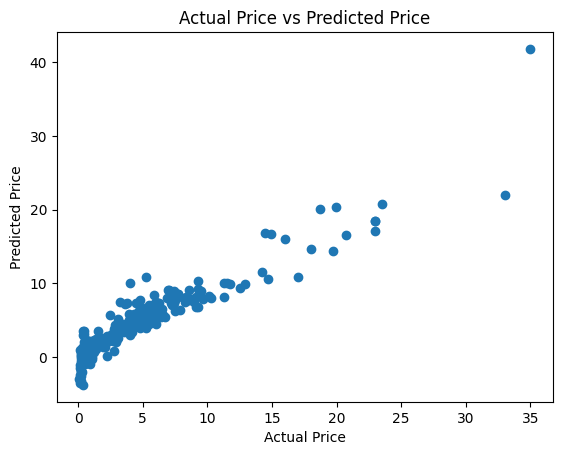

In [98]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

In [99]:
# Prediction on Training Data
training_data_prediction=lin_reg_model.predict(X_test)
error_score_test=metrics.r2_score(Y_test,training_data_prediction)
print('R square error :',error_score_test)

R square error : 0.8365766715027051


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

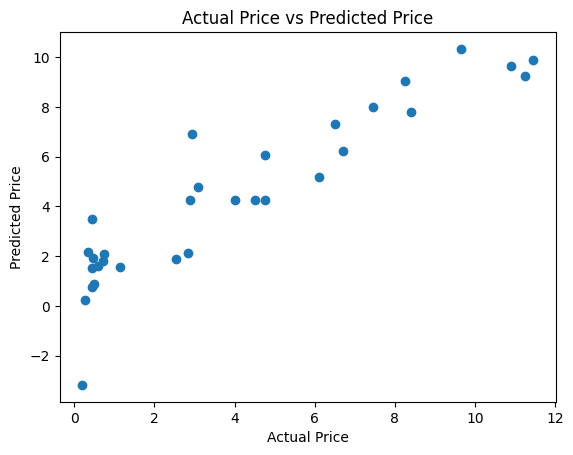

In [100]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

# Lasso Reg

In [ ]:
# Implementing Lasso regression model


In [101]:
lass_reg_model= Lasso()

# Now we have to the fit the data to lin_reg

In [69]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [70]:
# Prediction on Training Data
training_data_prediction=lass_reg_model.predict(X_train)

In [72]:
# R square error
error_score_train=metrics.r2_score(Y_train,training_data_prediction)
print('R square error :',error_score_train)

R square error : 0.8427856123435794


# Visualisizing the actual prices and Predicted prices

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

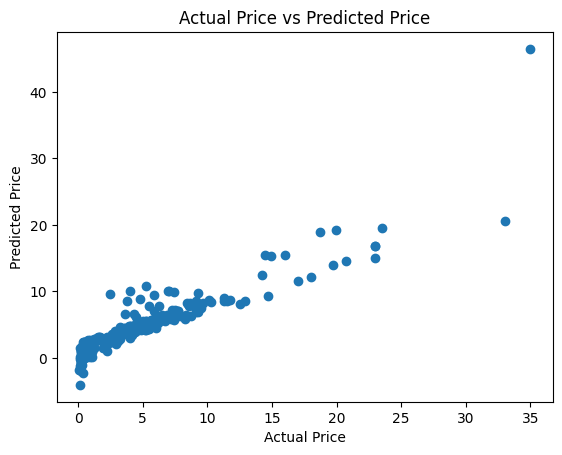

In [73]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

In [75]:
# Prediction on Training Data
training_data_prediction=lass_reg_model.predict(X_test)
error_score_test=metrics.r2_score(Y_test,training_data_prediction)
print('R square error :',error_score_test)

R square error : 0.8709167941173195


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

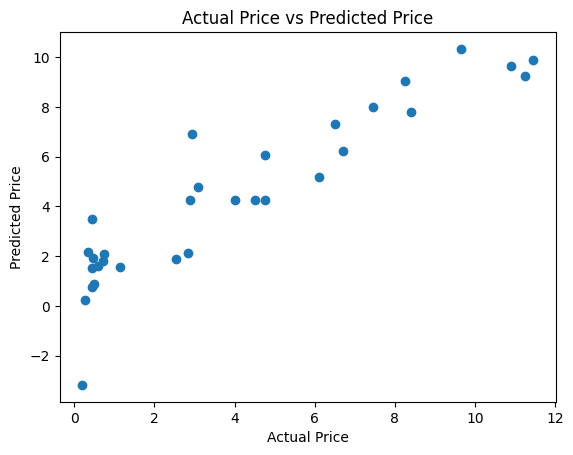

In [ ]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

Training R square error: 0.9999896680984235


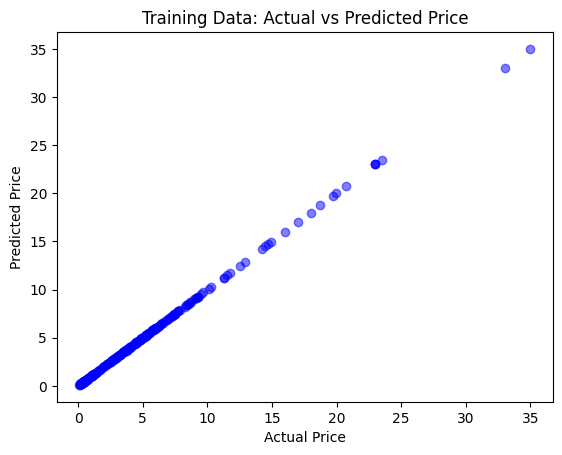

Test R square error: 0.9807321370840111


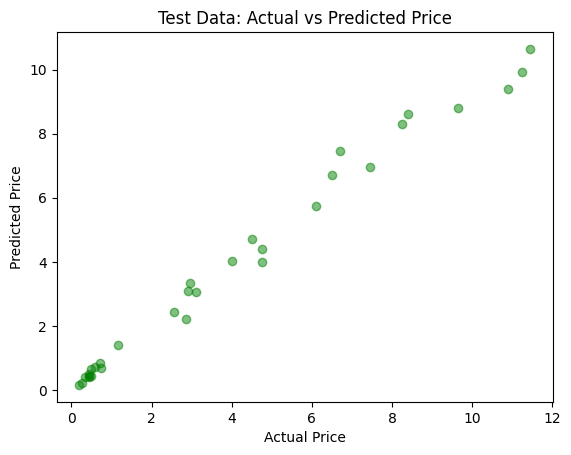

In [102]:
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the model
xgb_model = XGBRegressor()

# Fit the model on training data
xgb_model.fit(X_train, Y_train)

# ------------------ Training Data Evaluation ------------------

# Prediction on training data
training_data_prediction = xgb_model.predict(X_train)

# R² score for training
error_score_train = metrics.r2_score(Y_train, training_data_prediction)
print('Training R square error:', error_score_train)

# Visualization - Training
plt.scatter(Y_train, training_data_prediction, color='blue', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Data: Actual vs Predicted Price')
plt.show()

# ------------------ Test Data Evaluation ------------------

# Prediction on test data
test_data_prediction = xgb_model.predict(X_test)

# R² score for test
error_score_test = metrics.r2_score(Y_test, test_data_prediction)
print('Test R square error:', error_score_test)

# Visualization - Testing
plt.scatter(Y_test, test_data_prediction, color='green', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Data: Actual vs Predicted Price')
plt.show()

